In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('../data/train.csv')

In [3]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [24]:
train.is_attributed.value_counts(normalize=True) * 100

0    99.752928
1     0.247072
Name: is_attributed, dtype: float64

In [4]:
train.loc[train.ip == 83230, 'is_attributed'].value_counts()

0    25676
1       43
Name: is_attributed, dtype: int64

In [11]:
subset = train.loc[train.ip == 83230].sort_values(['ip', 'app', 'device', 'os', 'channel', 'click_time'])

In [12]:
subset.shape

(25719, 8)

In [13]:
subset.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
83340966,83230,1,1,1,17,2017-11-08 04:18:42,NaN,0
83740504,83230,1,1,1,17,2017-11-08 04:25:25,NaN,0
159400686,83230,1,1,1,134,2017-11-09 08:04:43,NaN,0
166483312,83230,1,1,1,134,2017-11-09 10:28:01,NaN,0
130842586,83230,1,1,1,135,2017-11-08 23:36:31,NaN,0


In [14]:
gpd = subset.groupby(['ip', 'app', 'device', 'os', 'channel'])

In [15]:
avg_attr = gpd['is_attributed'].mean()

In [16]:
avg_attr.head()

ip     app  device  os  channel
83230  1    1       1   17         0.0
                        134        0.0
                        135        0.0
                        153        0.0
                        377        0.0
Name: is_attributed, dtype: float64

In [17]:
avg_attr.loc[(avg_attr > 0) & (avg_attr < 1)]

ip     app  device  os   channel
83230  8    1       15   145        0.083333
                    22   145        0.052632
       9    1       19   334        0.004950
       10   1       8    317        0.333333
                    13   113        0.166667
       11   1       19   122        0.071429
       18   1       28   107        0.200000
       19   0       0    213        0.285714
                    21   213        0.200000
                    24   213        0.235294
                         347        0.500000
                    38   333        0.125000
                    748  347        0.333333
            116     24   213        0.333333
       20   1       13   478        0.050000
       29   1       18   213        0.333333
                    19   213        0.090909
       35   1       13   21         0.750000
       37   1       19   21         0.142857
       62   1       19   21         0.500000
Name: is_attributed, dtype: float64

In [18]:
subset.loc[
    (subset.ip == 83230) &
    (subset.app == 8) &
    (subset.device == 1) &
    (subset.os == 15) &
    (subset.channel == 145)
]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
157113888,83230,8,1,15,145,2017-11-09 07:18:54,NaN,0
157243370,83230,8,1,15,145,2017-11-09 07:21:18,NaN,0
157262874,83230,8,1,15,145,2017-11-09 07:21:38,NaN,0
157308628,83230,8,1,15,145,2017-11-09 07:22:28,NaN,0
157316808,83230,8,1,15,145,2017-11-09 07:22:37,NaN,0
157340150,83230,8,1,15,145,2017-11-09 07:23:02,NaN,0
157423291,83230,8,1,15,145,2017-11-09 07:24:35,NaN,0
157448117,83230,8,1,15,145,2017-11-09 07:25:03,NaN,0
157478822,83230,8,1,15,145,2017-11-09 07:25:37,NaN,0
157499494,83230,8,1,15,145,2017-11-09 07:25:59,NaN,0


In [19]:
subset.loc[
    (subset.ip == 83230) &
    (subset.app == 62) &
    (subset.device == 1) &
    (subset.os == 19) &
    (subset.channel == 21)
]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
14721564,83230,62,1,19,21,2017-11-07 01:32:14,2017-11-07 06:48:34,1
159985403,83230,62,1,19,21,2017-11-09 08:17:07,NaN,0


In [12]:
def display_positive(col):
    fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
    train.loc[:, col].hist(bins=20, ax=axs[0])
    train.loc[train.is_attributed == 1, col].hist(bins=20, ax=axs[1])

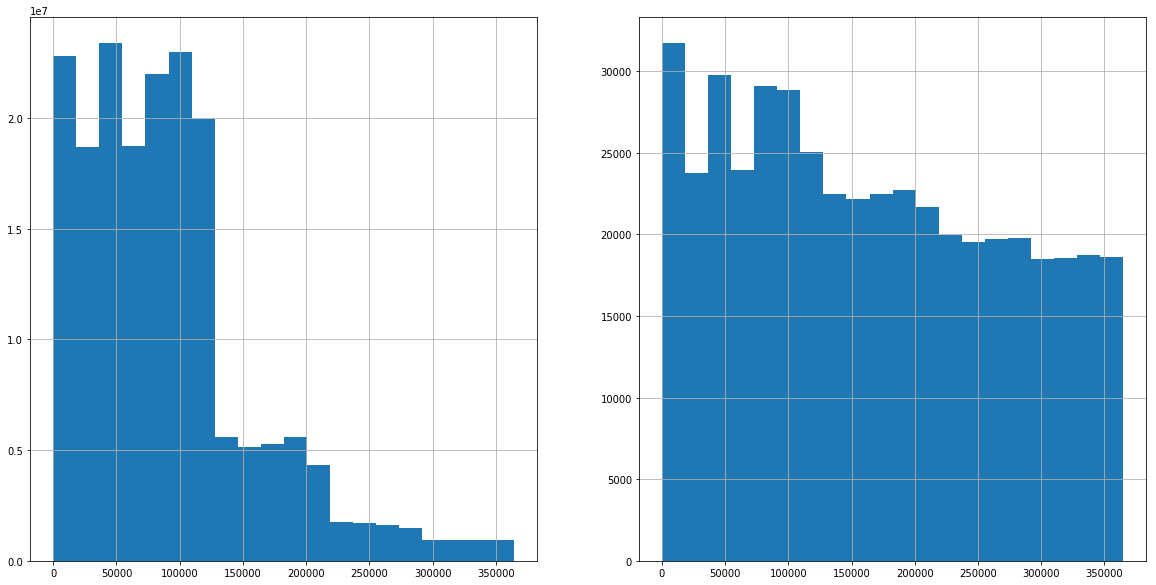

In [13]:
display_positive('ip')

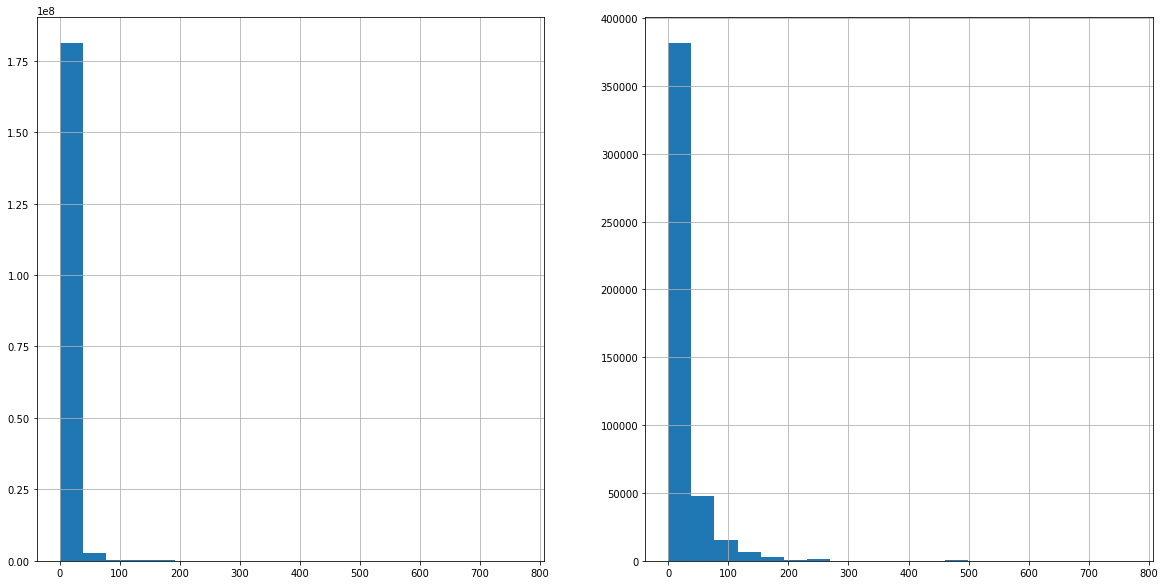

In [14]:
display_positive('app')

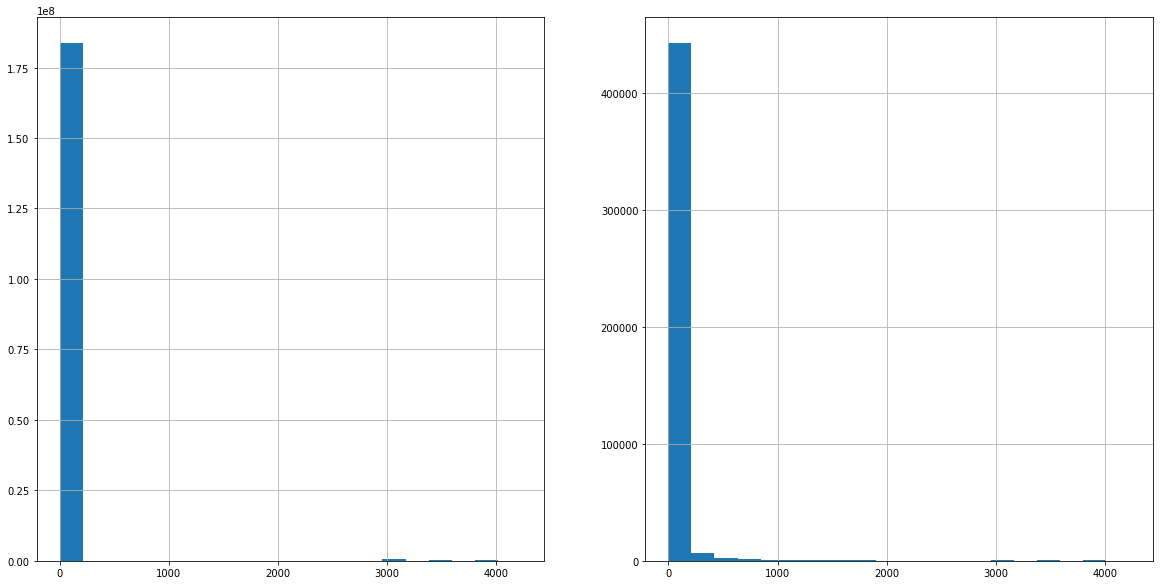

In [15]:
display_positive('device')

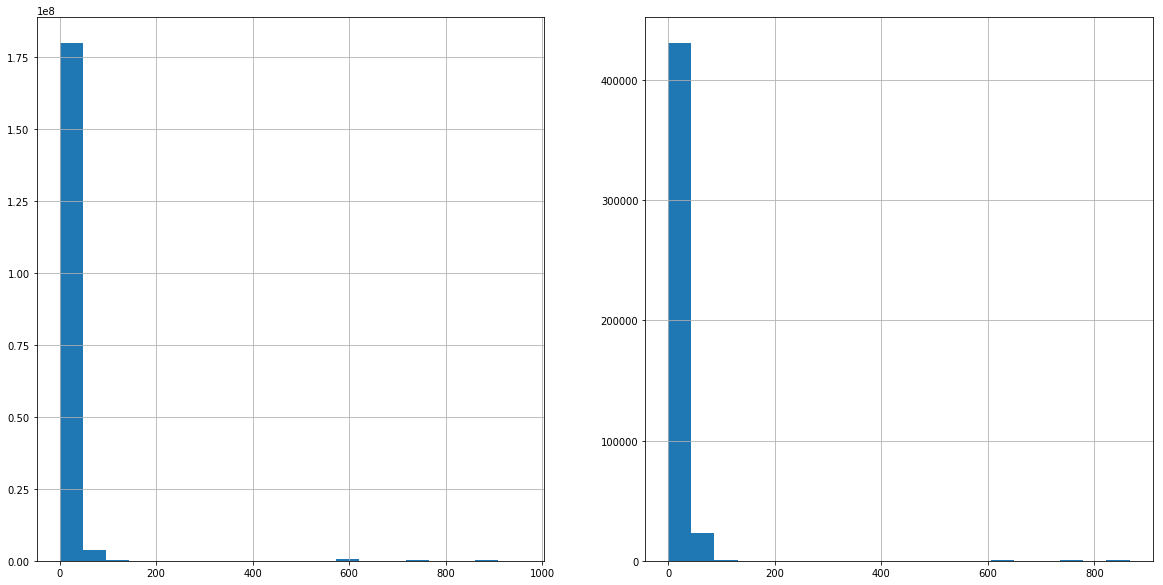

In [16]:
display_positive('os')

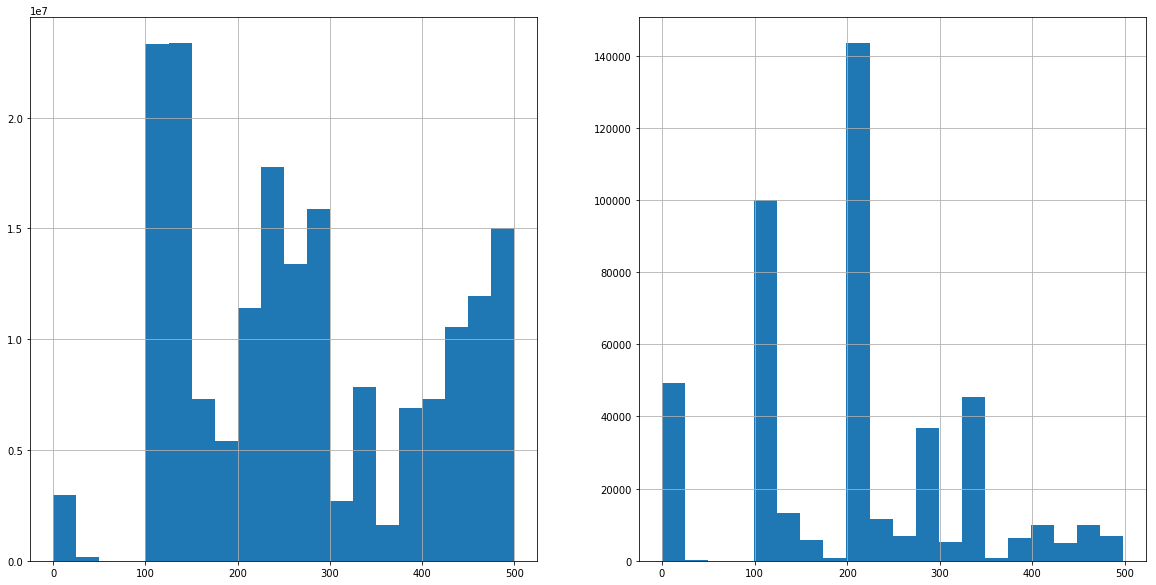

In [17]:
display_positive('channel')

In [29]:
def scatter(col1, col2, size=500, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=(10, 10))
    samples = train.sample(size)
    samples.loc[samples.is_attributed == 0].plot(kind='scatter', x=col1, y=col2, color='r', ax=ax)
    samples.loc[samples.is_attributed == 1].plot(kind='scatter', x=col1, y=col2, color='b', ax=ax)
    ax.grid()

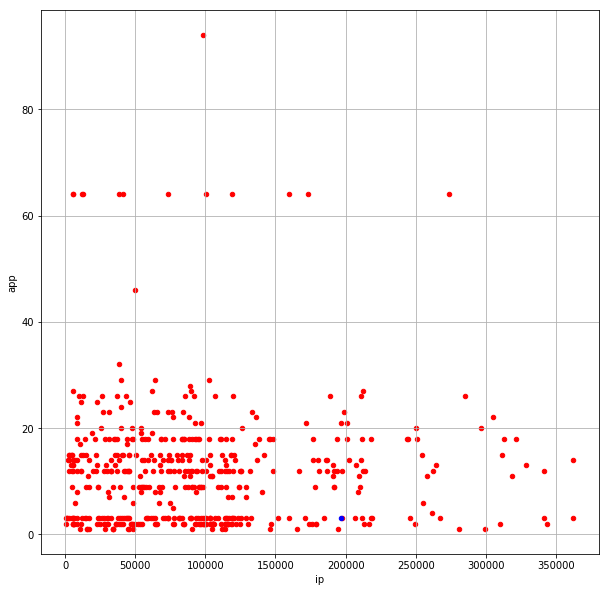

In [30]:
scatter('ip', 'app', figsize=(6, 6))

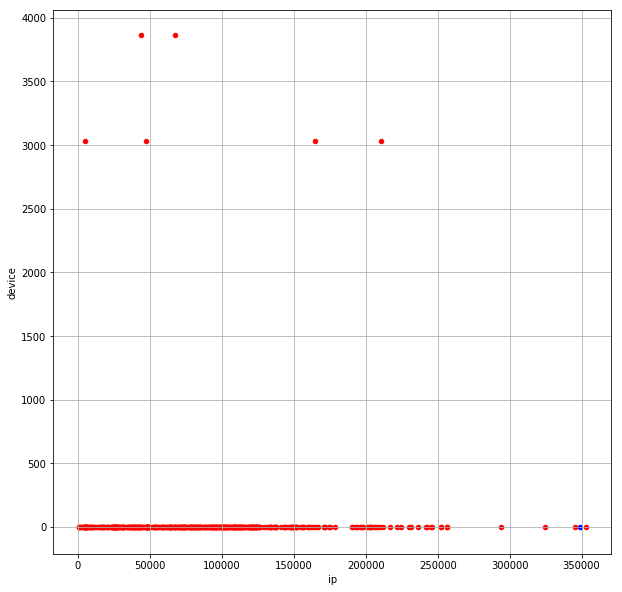

In [31]:
scatter('ip', 'device', figsize=(6, 6))

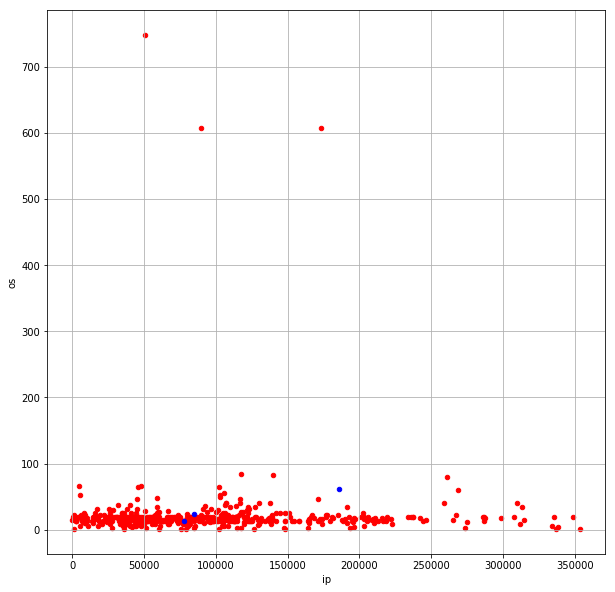

In [32]:
scatter('ip', 'os', figsize=(6, 6))

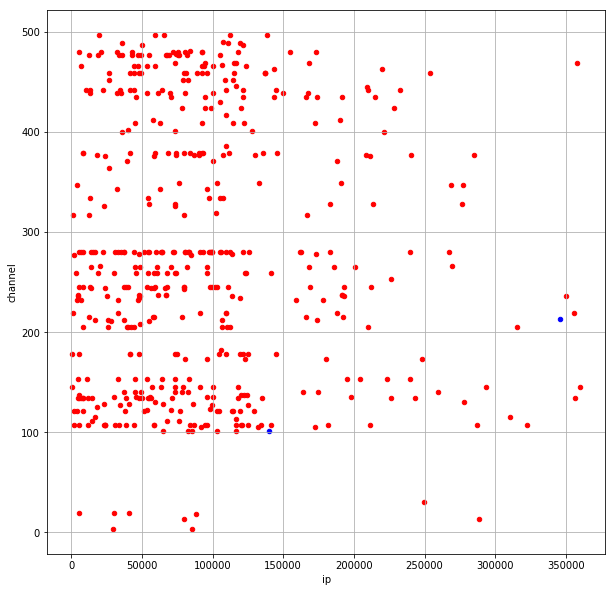

In [33]:
scatter('ip', 'channel', figsize=(6, 6))

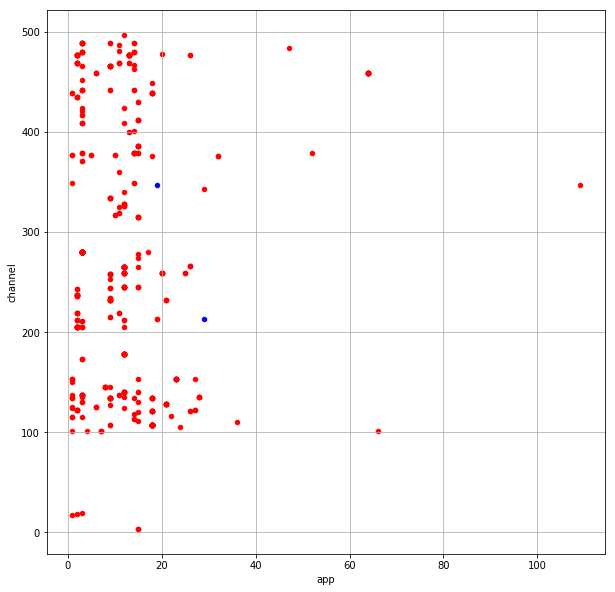

In [34]:
scatter('app', 'channel', figsize=(6, 6))

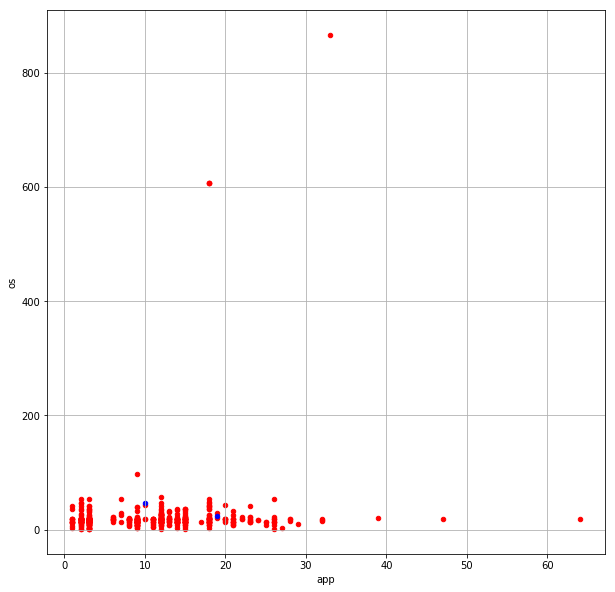

In [36]:
scatter('app', 'os', figsize=(6, 6))

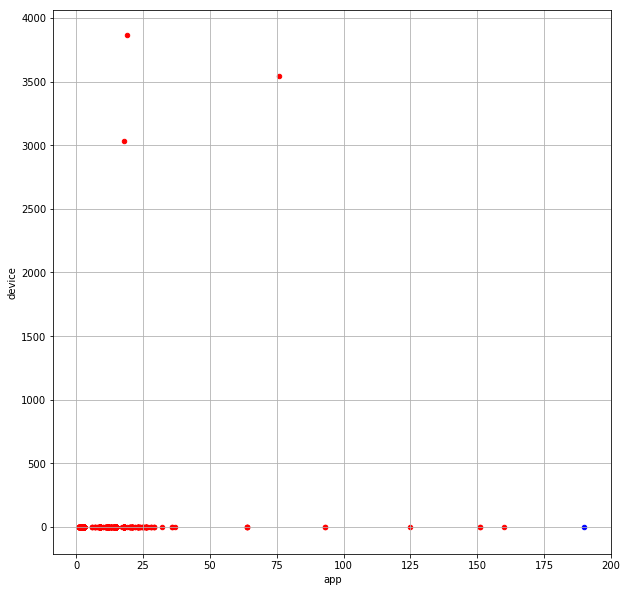

In [37]:
scatter('app', 'device', figsize=(6, 6))

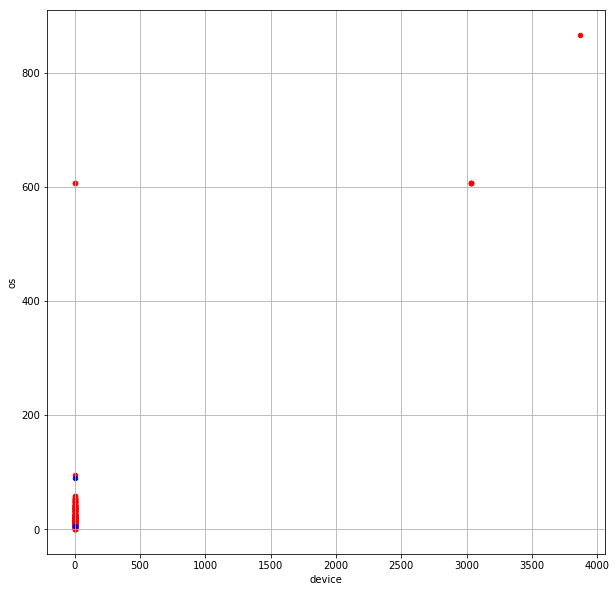

In [38]:
scatter('device', 'os', figsize=(6, 6))

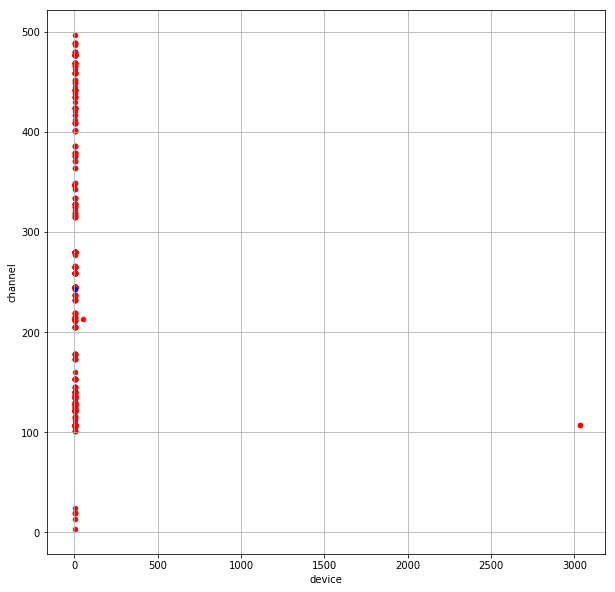

In [39]:
scatter('device', 'channel', figsize=(6, 6))

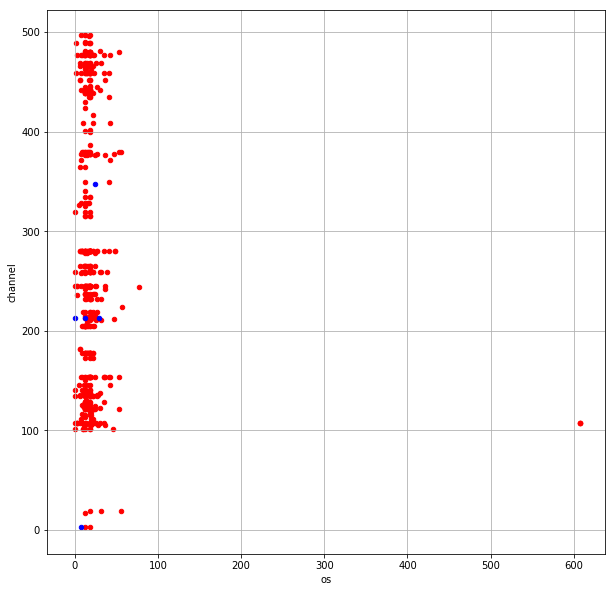

In [41]:
scatter('os', 'channel', figsize=(6, 6))

In [16]:
train.loc[:, 'click_datetime'] = pd.to_datetime(train.click_time, format='%Y-%m-%d %H:%M:%S')

In [11]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_datetime
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,2017-11-06 14:32:21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,2017-11-06 14:33:34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,2017-11-06 14:34:12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,2017-11-06 14:34:52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,2017-11-06 14:35:08


In [12]:
train.click_datetime.min()

Timestamp('2017-11-06 14:32:21')

In [13]:
train.click_datetime.max()

Timestamp('2017-11-09 16:00:00')

In [18]:
train.loc[:, 'click_datetime'] = train.click_datetime + pd.Timedelta(8, unit='h')

In [26]:
train.loc[:, 'click_datetime'] = train.click_datetime - pd.Timedelta(6, unit='h')

In [19]:
train.click_datetime.min()

Timestamp('2017-11-06 22:32:21')

In [20]:
train.click_datetime.max()

Timestamp('2017-11-10 00:00:00')

In [27]:
gp = train.loc[train.is_attributed == 1].groupby(pd.Grouper(key='click_datetime', freq='H'))

In [28]:
total_gp = train.groupby(pd.Grouper(key='click_datetime', freq='H'))

In [29]:
total_sum = total_gp['is_attributed'].size()

In [30]:
inst_sum = gp['is_attributed'].sum()

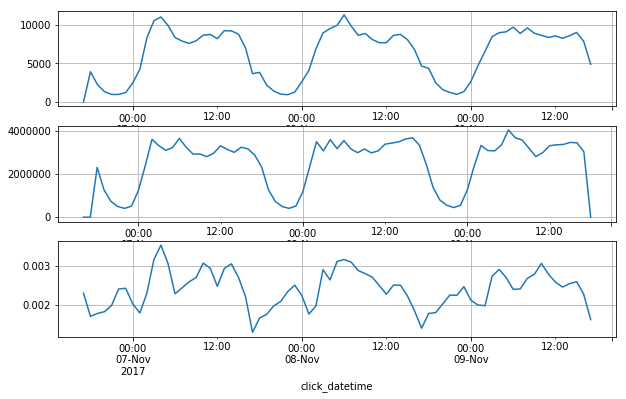

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(30, 15))
inst_sum.plot(figsize=(10, 6), grid=True, ax=axs[0])
total_sum.plot(figsize=(10, 6), grid=True, ax=axs[1])
(inst_sum / total_sum).plot(figsize=(10, 6), grid=True, ax=axs[2])

In [32]:
train.ip.nunique()

277396

In [33]:
train.app.nunique()

706

In [34]:
train.device.nunique()

3475

In [35]:
train.os.nunique()

800

In [36]:
train.channel.nunique()

202

In [63]:
from sklearn.metrics import roc_auc_score

In [65]:
roc_auc_score(train.is_attributed.sample(1000), [0]*1000)

0.5

In [67]:
train.loc[:, 'hour_mins'] = train.click_datetime.dt.hour * 60 + train.click_datetime.dt.minute

In [68]:
gpd_hm = train.groupby('hour_mins')

In [70]:
hm_rate = gpd_hm['is_attributed'].sum() / gpd_hm.size()

In [71]:
hm_rate.head()

hour_mins
0    0.001614
1    0.001686
2    0.001664
3    0.001704
4    0.001610
dtype: float64

In [84]:
hm_rate.shape

(1440,)

In [85]:
24*60

1440

In [74]:
hm_rate.name = 'rate'

In [96]:
samples = train.sample(10000)

In [97]:
samples = pd.merge(samples, hm_rate.reset_index(), on='hour_mins', how='left')

In [98]:
samples.rate.isnull().sum()

0

In [99]:
roc_auc_score(samples.is_attributed, samples.rate)

0.51307304196738834

Now lets make an attempt result

In [78]:
test = pd.read_csv('../data/test.csv')

In [79]:
test.loc[:, 'click_datetime'] = pd.to_datetime(test.click_time, format='%Y-%m-%d %H:%M:%S')

In [101]:
test.loc[:, 'hour_mins'] = test.click_datetime.dt.hour * 60 + test.click_datetime.dt.minute

In [103]:
test = pd.merge(test, hm_rate.reset_index(), on='hour_mins', how='left')

In [104]:
test.rate.isnull().sum()

0

In [100]:
test.head()

,click_id,ip,app,device,os,channel,click_time,click_datetime,hour_mins,rate
0,0,5744,9,1,3,107,2017-11-10 04:00:00,2017-11-10 04:00:00,2017-11-10 04:00:00.000000240,NaN
1,1,119901,9,1,3,466,2017-11-10 04:00:00,2017-11-10 04:00:00,2017-11-10 04:00:00.000000240,NaN
2,2,72287,21,1,19,128,2017-11-10 04:00:00,2017-11-10 04:00:00,2017-11-10 04:00:00.000000240,NaN
3,3,78477,15,1,13,111,2017-11-10 04:00:00,2017-11-10 04:00:00,2017-11-10 04:00:00.000000240,NaN
4,4,123080,12,1,13,328,2017-11-10 04:00:00,2017-11-10 04:00:00,2017-11-10 04:00:00.000000240,NaN


In [102]:
test = test.drop('rate', axis=1)

In [105]:
sample_sub = pd.read_csv('../data/sample_submission.csv')

In [106]:
sample_sub.head()

,click_id,is_attributed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [108]:
test = test.rename(columns={'rate': 'is_attributed'})

In [109]:
to_sub = test.loc[:, ['click_id', 'is_attributed']]

In [110]:
to_sub.head()

,click_id,is_attributed
0,0,0.002486
1,1,0.002486
2,2,0.002486
3,3,0.002486
4,4,0.002486


In [111]:
to_sub.is_attributed.isnull().sum()

0

In [112]:
to_sub.to_csv('../results/simple.csv', index=False)